## Vedant Ganesh - 230968340
- ### Week 2 - Exercise 1
- ### Date - 5/08/2025

#### 1. Import modules

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L1, L2

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

#### 2. Read dataset, EDA and preprocessing

In [6]:
df = pd.read_csv('Churn_Modelling (1).csv')
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

<Axes: >

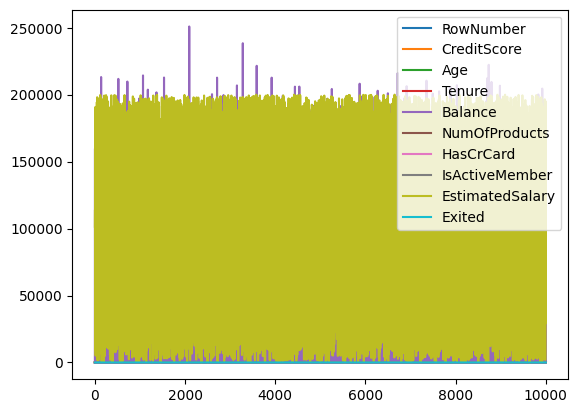

In [7]:
df.drop('CustomerId', axis=1).plot()

In [8]:
print(df.info(), '\n')
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None 

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10

In [9]:
df.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace = True) #Dropping the features which have no logical use

In [10]:
df

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [11]:
le = LabelEncoder()
#Label encoding the features with categorical values
df['Geography'] = le.fit_transform(df['Geography'])
df['Gender'] = le.fit_transform(df['Gender'])

In [12]:
df
#No scaling done just yet

CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619          0       0   42       2       0.00              1   
1             608          2       0   41       1   83807.86              1   
2             502          0       0   42       8  159660.80              3   
3             699          0       0   39       1       0.00              2   
4             850          2       0   43       2  125510.82              1   
...           ...        ...     ...  ...     ...        ...            ...   
9995          771          0       1   39       5       0.00              2   
9996          516          0       1   35      10   57369.61              1   
9997          709          0       0   36       7       0.00              1   
9998          772          1       1   42       3   75075.31              2   
9999          792          0       0   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0             1               1        101348.88       1  
1             0               1        112542.58       0  
2             1               0        113931.57       1  
3             0               0         93826.63       0  
4             1               1         79084.10       0  
...         ...             ...              ...     ...  
9995          1               0         96270.64       0  
9996          1               1        101699.77       0  
9997          0               1         42085.58       1  
9998          1               0         92888.52       1  
9999          1               0         38190.78       0  

[10000 rows x 11 columns]

In [13]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### 3. Feature and target split, train and test split

In [15]:
X = df.drop('Exited', axis = 1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=42) #Standard 90:10 split, No stratification yet

In [16]:
print("Shape of X_train, X_test, y_train, y_test is : ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

Shape of X_train, X_test, y_train, y_test is :  (9000, 10) (1000, 10) (9000,) (1000,)


In [17]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

#### 4. Model Architecture

##### We are going to try multiple different architectures.
- Architecture = {
    1 : [128, 0, 0],
    2 : [128, 64, 0],
    3 : [128, 64, 32]
}
- Activations = [Sigmoid, ReLU]
- Epochs = [10, 20, 30]
- Regularistion = [None, L1, L2]
- LearningRate = [0.1, 0.01, 0.001]


There will be multiple for-loops trying all possible combinations
1_layer first -> 2_layer -> 3_layer

In [20]:
epochs = [10, 20, 30]
activations = ['sigmoid','relu']
LearningRate = [0.1, 0.01, 0.001]
Regularisers = [None, L1(0.001), L2(0.001)]

In [21]:
# 1 layer
layer1_histories = []
batch = 10

for epoch in epochs:
    for acti in activations:
        for lr in LearningRate:
            for regu in Regularisers:
                #Trying all possible combinations literally. 
                # Model building
                model_1layer = Sequential(
                    [
                        Input(shape=(X_train.shape[1], ), name='Input'),
                        
                        Dense(
                            units=128, 
                            activation=acti,
                            name='H1',
                            kernel_regularizer=regu, #regularisation added.
                            bias_regularizer=regu,
                            activity_regularizer=regu
                            ),
                        
                        Dense(units=1, activation=acti, name='Output') #all different activations
                    ]
                )

                #Compiling with all learning rates
                model_1layer.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

                
                history = model_1layer.fit(X_train, y_train, validation_split = 0.1, epochs=epoch, batch_size=batch)
                layer1_histories.append(history)

Epoch 1/10
810/810 [==============================] - 2s 2ms/step - loss: 0.4478 - accuracy: 0.8183 - val_loss: 0.3850 - val_accuracy: 0.8333
Epoch 2/10
810/810 [==============================] - 1s 1ms/step - loss: 0.3929 - accuracy: 0.8400 - val_loss: 0.4048 - val_accuracy: 0.8411
Epoch 3/10
810/810 [==============================] - 1s 1ms/step - loss: 0.3892 - accuracy: 0.8412 - val_loss: 0.3880 - val_accuracy: 0.8422
Epoch 4/10
810/810 [==============================] - 1s 1ms/step - loss: 0.3812 - accuracy: 0.8412 - val_loss: 0.3903 - val_accuracy: 0.8467
Epoch 5/10
810/810 [==============================] - 1s 1ms/step - loss: 0.4155 - accuracy: 0.8330 - val_loss: 0.4392 - val_accuracy: 0.8089
Epoch 6/10
810/810 [==============================] - 1s 1ms/step - loss: 0.3948 - accuracy: 0.8443 - val_loss: 0.3816 - val_accuracy: 0.8389
Epoch 7/10
810/810 [==============================] - 1s 1ms/step - loss: 0.3806 - accuracy: 0.8428 - val_loss: 0.3746 - val_accuracy: 0.8389
Epoch 

In [22]:
# 2 layer
layer2_histories = []
batch = 10

for epoch in epochs:
    for acti in activations:
        for lr in LearningRate:
            for regu in Regularisers:
                #Trying all possible combinations literally. 
                print(epoch, acti, lr, regu)
                # Model building
                model_2layer = Sequential(
                    [
                        Input(shape=(X_train.shape[1], ), name='Input'),
                        
                        Dense(
                            units=128, 
                            activation=acti,
                            name='H1',
                            kernel_regularizer=regu, #regularisation added.
                            bias_regularizer=regu,
                            activity_regularizer=regu
                            ),

                        Dense(
                            units=64, 
                            activation=acti,
                            name='H2',
                            kernel_regularizer=regu, #regularisation added.
                            bias_regularizer=regu,
                            activity_regularizer=regu
                            ),
                        
                        Dense(units=1, activation=acti, name='Output') #all different activations
                    ]
                )

                #Compiling with all learning rates
                model_2layer.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

                
                history = model_2layer.fit(X_train, y_train, validation_split = 0.1, epochs=epoch, batch_size=batch)
                layer2_histories.append(history)

10 sigmoid 0.1 None
Epoch 1/10
810/810 [==============================] - 2s 1ms/step - loss: 0.6037 - accuracy: 0.7736 - val_loss: 0.6743 - val_accuracy: 0.8000
Epoch 2/10
810/810 [==============================] - 1s 1ms/step - loss: 0.6035 - accuracy: 0.7588 - val_loss: 0.6401 - val_accuracy: 0.8000
Epoch 3/10
810/810 [==============================] - 1s 1ms/step - loss: 0.5973 - accuracy: 0.7635 - val_loss: 0.6088 - val_accuracy: 0.8000
Epoch 4/10
810/810 [==============================] - 1s 1ms/step - loss: 0.5944 - accuracy: 0.7617 - val_loss: 0.5196 - val_accuracy: 0.8000
Epoch 5/10
810/810 [==============================] - 1s 1ms/step - loss: 0.5868 - accuracy: 0.7726 - val_loss: 0.5006 - val_accuracy: 0.8000
Epoch 6/10
810/810 [==============================] - 1s 1ms/step - loss: 0.6057 - accuracy: 0.7652 - val_loss: 0.5064 - val_accuracy: 0.8000
Epoch 7/10
810/810 [==============================] - 1s 1ms/step - loss: 0.5800 - accuracy: 0.7741 - val_loss: 0.5535 - val_acc

In [23]:
# 3 layer
layer3_histories = []
batch = 10

for epoch in epochs:
    for acti in activations:
        for lr in LearningRate:
            for regu in Regularisers:
                #Trying all possible combinations literally. 
                print(epoch, acti, lr, regu)
                # Model building
                model_3layer = Sequential(
                    [
                        Input(shape=(X_train.shape[1], ), name='Input'),
                        
                        Dense(
                            units=128, 
                            activation=acti,
                            name='H1',
                            kernel_regularizer=regu, #regularisation added.
                            bias_regularizer=regu,
                            activity_regularizer=regu
                            ),

                        Dense(
                            units=64, 
                            activation=acti,
                            name='H2',
                            kernel_regularizer=regu, #regularisation added.
                            bias_regularizer=regu,
                            activity_regularizer=regu
                            ),

                        Dense(
                            units=32, 
                            activation=acti,
                            name='H3',
                            kernel_regularizer=regu, #regularisation added.
                            bias_regularizer=regu,
                            activity_regularizer=regu
                            ),
                        
                        Dense(units=1, activation=acti, name='Output') #all different activations
                    ]
                )

                #Compiling with all learning rates
                model_3layer.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

                
                history = model_3layer.fit(X_train, y_train, validation_split = 0.1, epochs=epoch, batch_size=batch)
                layer3_histories.append(history)

10 sigmoid 0.1 None
Epoch 1/10
810/810 [==============================] - 2s 1ms/step - loss: 0.5280 - accuracy: 0.7938 - val_loss: 0.5880 - val_accuracy: 0.8000
Epoch 2/10
810/810 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7943 - val_loss: 0.5448 - val_accuracy: 0.8000
Epoch 3/10
810/810 [==============================] - 1s 1ms/step - loss: 0.5287 - accuracy: 0.7943 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 4/10
810/810 [==============================] - 1s 1ms/step - loss: 0.5337 - accuracy: 0.7943 - val_loss: 0.5065 - val_accuracy: 0.8000
Epoch 5/10
810/810 [==============================] - 1s 1ms/step - loss: 0.5282 - accuracy: 0.7936 - val_loss: 0.5004 - val_accuracy: 0.8000
Epoch 6/10
810/810 [==============================] - 1s 1ms/step - loss: 0.5249 - accuracy: 0.7943 - val_loss: 0.5321 - val_accuracy: 0.8000
Epoch 7/10
810/810 [==============================] - 1s 1ms/step - loss: 0.5256 - accuracy: 0.7943 - val_loss: 0.5138 - val_acc

#### 5. Plotting all model histories

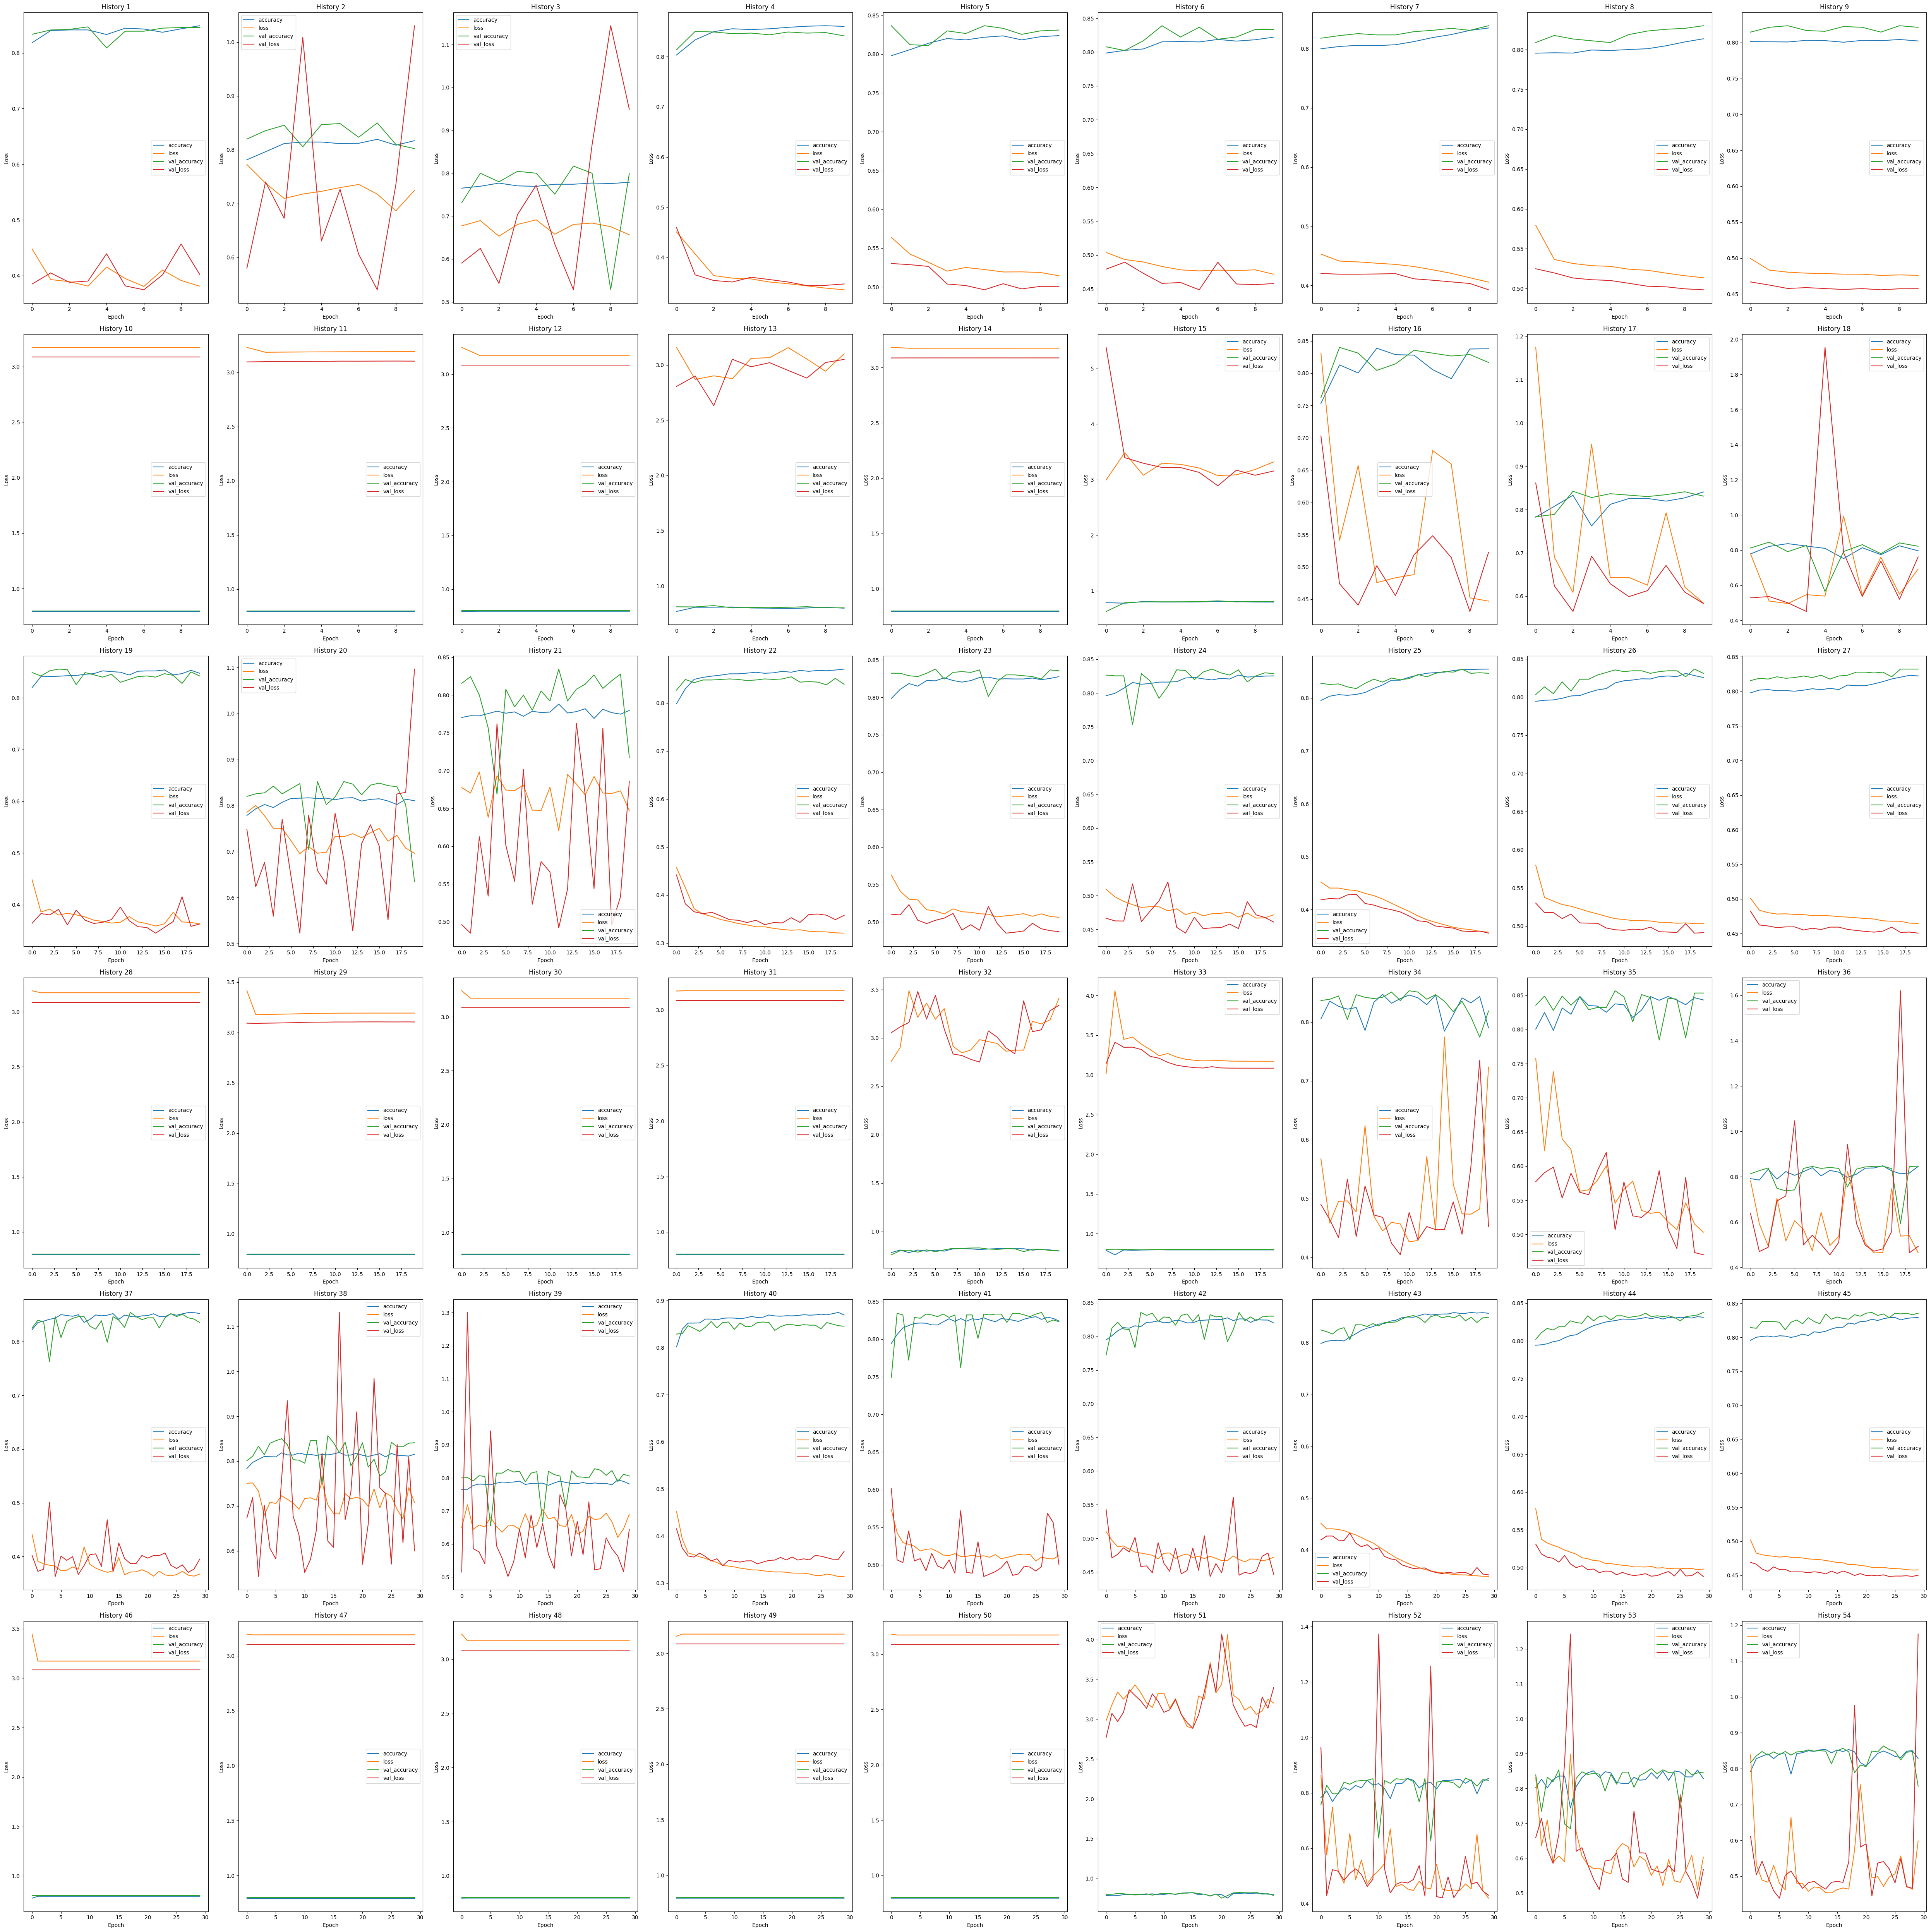

In [34]:
Keys = ['accuracy','loss','val_accuracy','val_loss']  

fig, axes = plt.subplots(6, 9, figsize=(50, 50))
axes = axes.flatten()

for i, history in enumerate(layer1_histories):
    
    axes[i].plot(history.history['accuracy'], label='accuracy')
    axes[i].plot(history.history['loss'], label='loss')
    axes[i].plot(history.history['val_accuracy'], label='val_accuracy')
    axes[i].plot(history.history['val_loss'], label='val_loss')

    axes[i].set_title(f'History {i+1}')
    axes[i].legend()
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Loss')

plt.tight_layout()
plt.show()

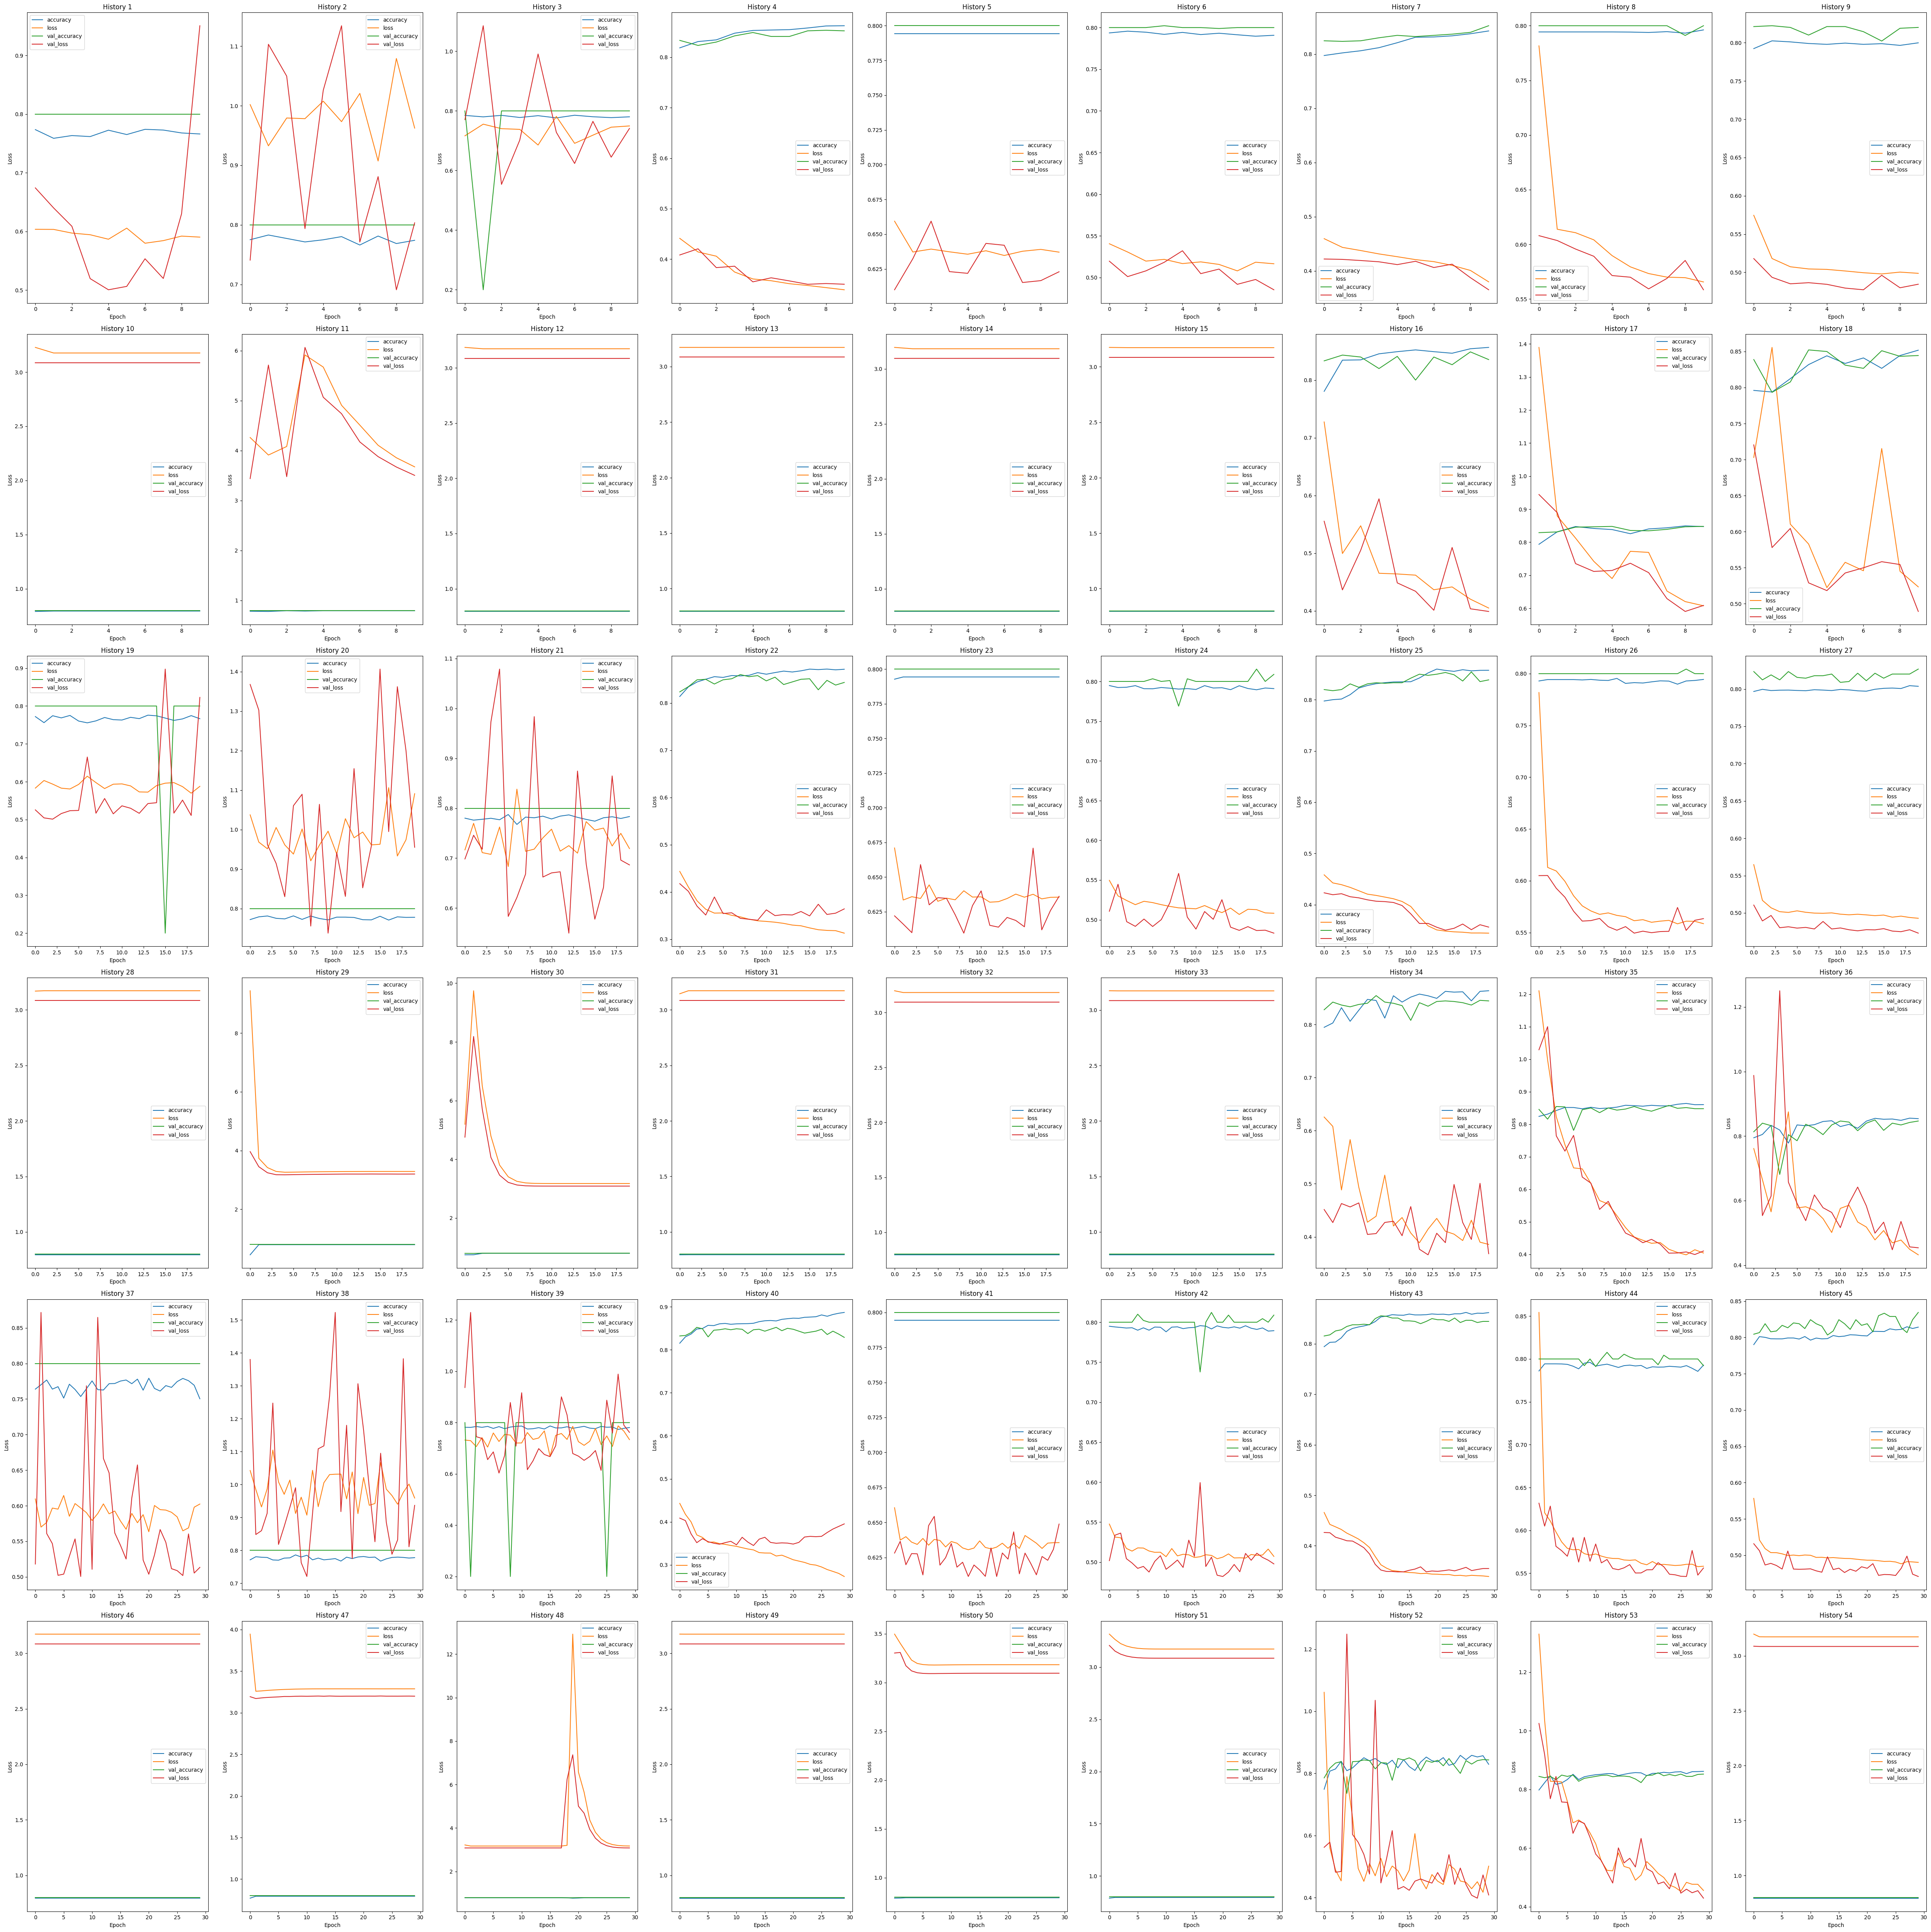

In [36]:
Keys = ['accuracy','loss','val_accuracy','val_loss']  

fig, axes = plt.subplots(6, 9, figsize=(50, 50))
axes = axes.flatten()

for i, history in enumerate(layer2_histories):
    
    axes[i].plot(history.history['accuracy'], label='accuracy')
    axes[i].plot(history.history['loss'], label='loss')
    axes[i].plot(history.history['val_accuracy'], label='val_accuracy')
    axes[i].plot(history.history['val_loss'], label='val_loss')

    axes[i].set_title(f'History {i+1}')
    axes[i].legend()
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Loss')

plt.tight_layout()
plt.show()

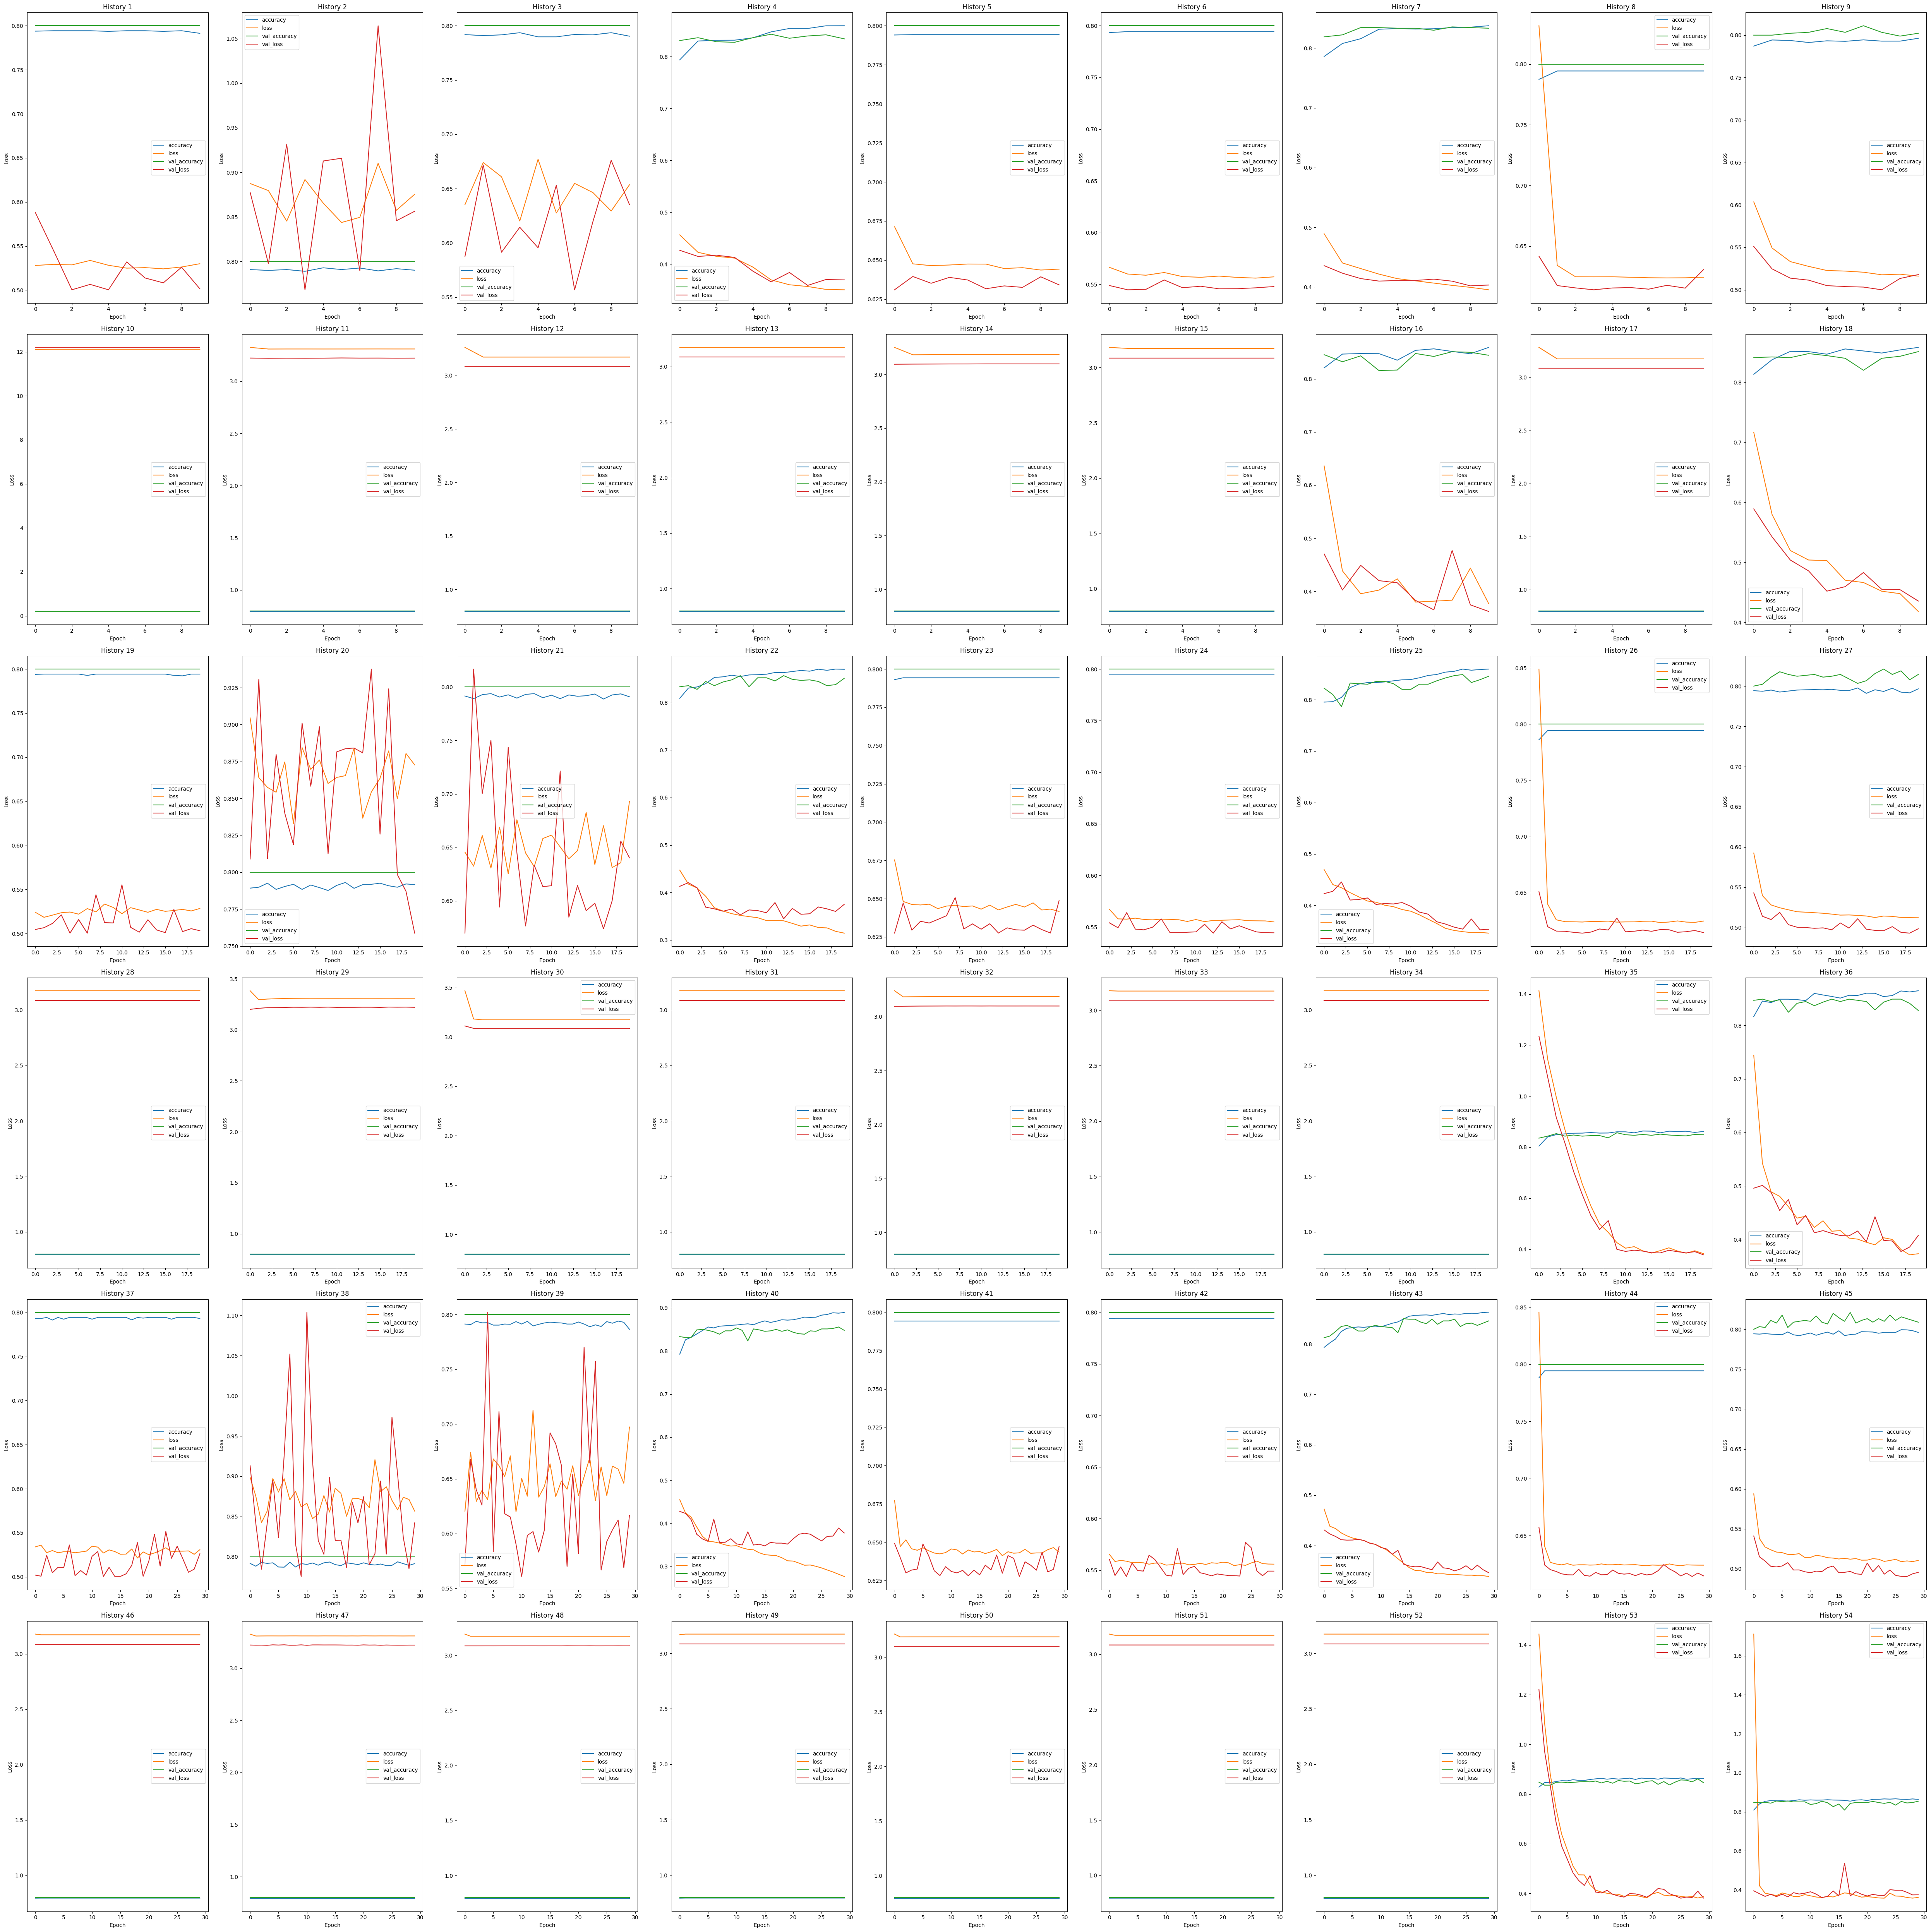

In [37]:
Keys = ['accuracy','loss','val_accuracy','val_loss']  

fig, axes = plt.subplots(6, 9, figsize=(50, 50))
axes = axes.flatten()

for i, history in enumerate(layer3_histories):
    
    axes[i].plot(history.history['accuracy'], label='accuracy')
    axes[i].plot(history.history['loss'], label='loss')
    axes[i].plot(history.history['val_accuracy'], label='val_accuracy')
    axes[i].plot(history.history['val_loss'], label='val_loss')

    axes[i].set_title(f'History {i+1}')
    axes[i].legend()
    axes[i].set_xlabel('Epoch')
    axes[i].set_ylabel('Loss')

plt.tight_layout()
plt.show()

In [40]:
def best_history(history_list):
    def score(history):
        val_loss = history.history['val_loss'][-1]
        val_acc = history.history['val_accuracy'][-1]
        return (val_loss, -val_acc)
        
    best = history_list[0]
    best_score = score(best)
    for history in history_list[1:]:
        current_score = score(history)
        if current_score < best_score:
            best = history
            best_score = current_score
    return best

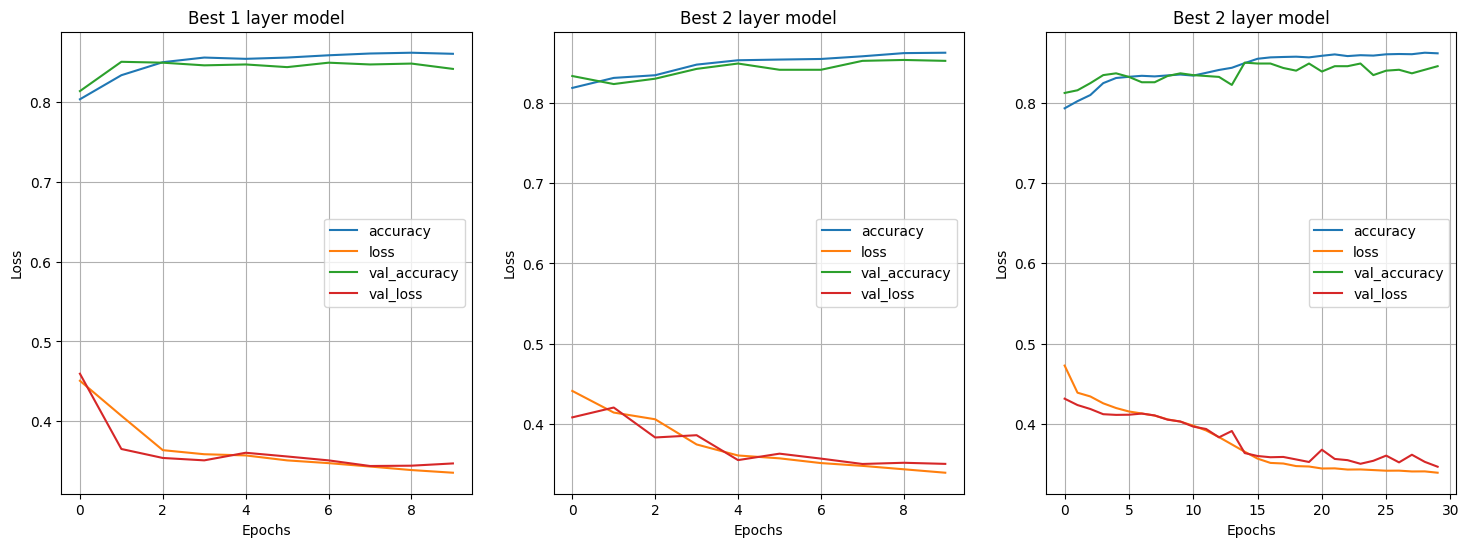

In [56]:
best_1layer_history = best_history(layer1_histories)
best_2layer_history = best_history(layer2_histories)
best_3layer_history = best_history(layer3_histories)


fig, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].plot(best_1layer_history.history['accuracy'], label='accuracy')
ax[0].plot(best_1layer_history.history['loss'], label='loss')
ax[0].plot(best_1layer_history.history['val_accuracy'], label='val_accuracy')
ax[0].plot(best_1layer_history.history['val_loss'], label='val_loss')
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Best 1 layer model")
ax[0].legend()
ax[0].grid(True)

ax[1].plot(best_2layer_history.history['accuracy'], label='accuracy')
ax[1].plot(best_2layer_history.history['loss'], label='loss')
ax[1].plot(best_2layer_history.history['val_accuracy'], label='val_accuracy')
ax[1].plot(best_2layer_history.history['val_loss'], label='val_loss')
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
ax[1].set_title("Best 2 layer model")
ax[1].legend()
ax[1].grid(True)

ax[2].plot(best_3layer_history.history['accuracy'], label='accuracy')
ax[2].plot(best_3layer_history.history['loss'], label='loss')
ax[2].plot(best_3layer_history.history['val_accuracy'], label='val_accuracy')
ax[2].plot(best_3layer_history.history['val_loss'], label='val_loss')
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("Loss")
ax[2].set_title("Best 2 layer model")
ax[2].legend()
ax[2].grid(True)

plt.show()

#### 6. Insights